In [160]:
import pandas as pd
import numpy as np
data=pd.read_csv('winequality-red.csv')

In [161]:
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [162]:
data = pd.read_csv('winequality-red.csv', sep=';', header=0)

In [163]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [220]:
print(data.shape)
print(data.info())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [164]:
data_drop=data.drop('quality',axis=1)

In [165]:
data_drop.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [166]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_drop)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
print(pca_df)

            PC1        PC2
0    -13.224905  -2.023900
1     22.037724   4.408322
2      7.162673  -2.501461
3     13.430063  -1.951122
4    -13.224905  -2.023900
...         ...        ...
1594   1.129111  16.313102
1595   9.489984  21.627525
1596  -3.431354  14.271243
1597   1.132878  16.316167
1598  -3.874377   3.126348

[1599 rows x 2 columns]


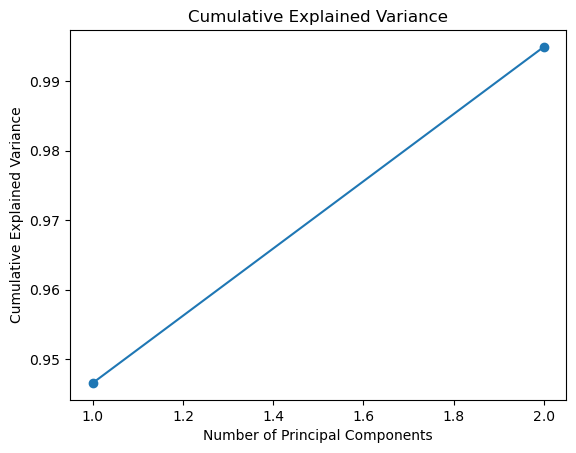

In [167]:
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

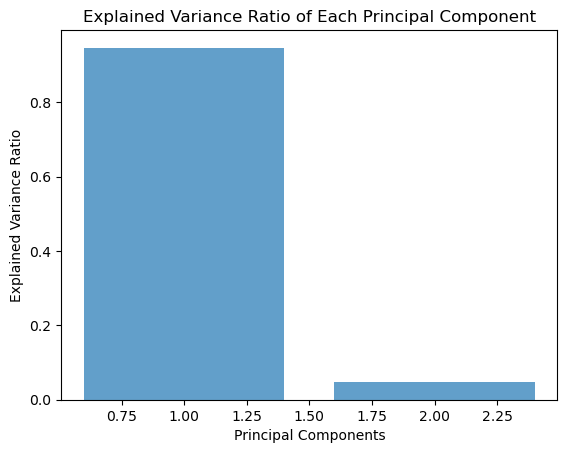

In [168]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [169]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
kmeans.fit(data_drop)

labels = kmeans.labels_

centers = kmeans.cluster_centers_
data_new=data_drop.copy()
data_new['Cluster'] = labels

In [170]:
print(data_new)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

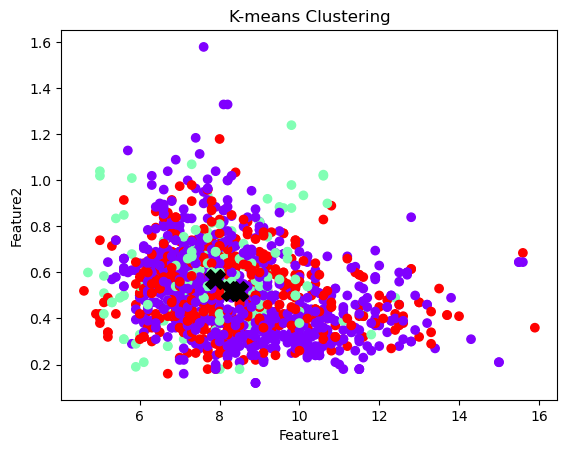

In [171]:
plt.scatter(data_new.iloc[:,0], data_new.iloc[:,1], c=data_new['Cluster'], cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='black')  # 클러스터 중심 표시
plt.title('K-means Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

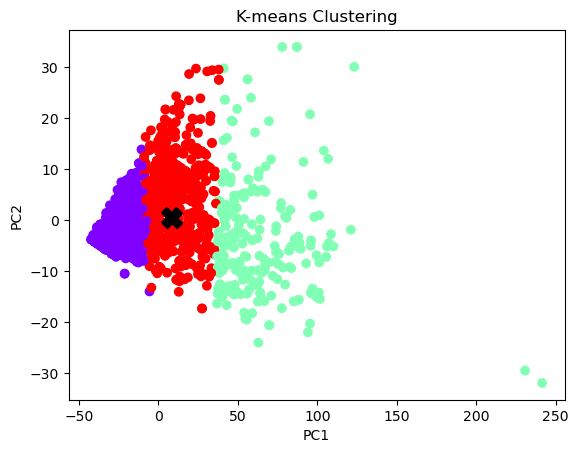

In [172]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data_new['Cluster'], cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='black')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [173]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [174]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_drop)

In [177]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled)

labels = dbscan.labels_

data_db=data_drop.copy()
data_db['Cluster'] = labels

print(data_db)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [178]:
data_db['Cluster'].unique()

array([-1,  0,  1,  2])

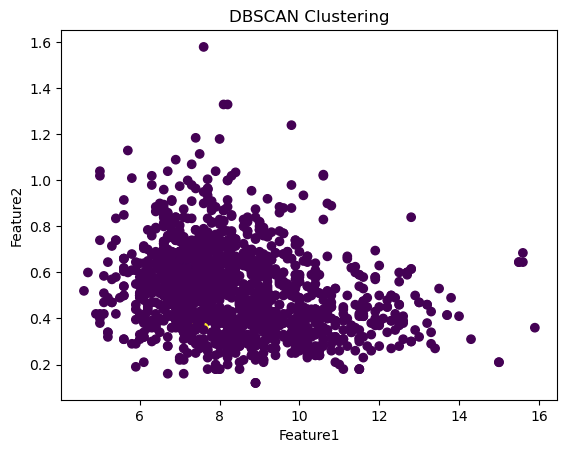

In [179]:
plt.scatter(data_db['fixed acidity'], data_db['volatile acidity'], c=data_db['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

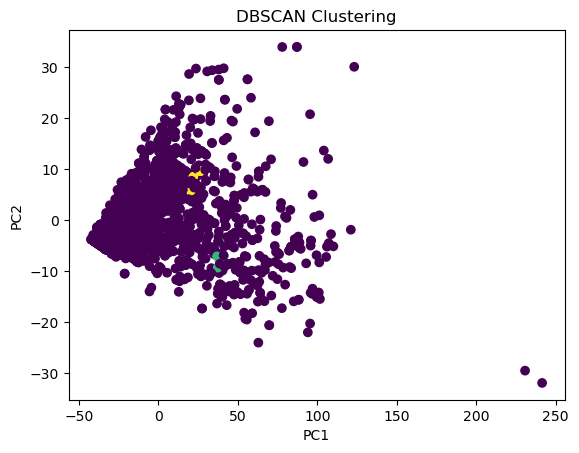

In [180]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data_db['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

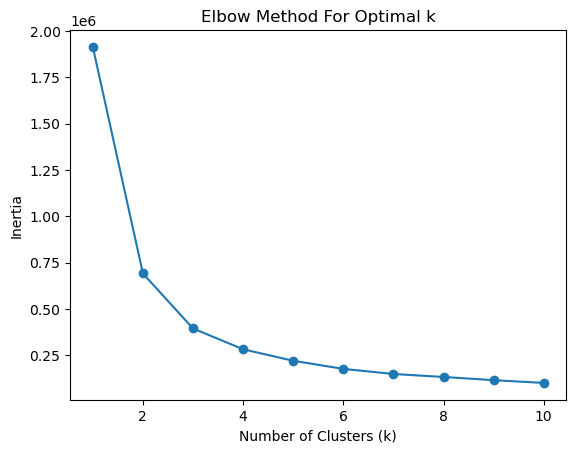

In [151]:
def calculate_inertia(data, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    return kmeans.inertia_

k_values = range(1, 11)
inertias = [calculate_inertia(data_drop, k) for k in k_values]

plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [181]:
data_db[data_db['Cluster']==-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,-1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,-1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,-1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,-1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,-1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,-1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,-1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,-1


In [216]:
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan.fit(pca_df)

labels = dbscan.labels_


pca_df['Cluster'] = labels

print(pca_df)

            PC1        PC2  Cluster
0    -13.224905  -2.023900        0
1     22.037724   4.408322        0
2      7.162673  -2.501461        0
3     13.430063  -1.951122        0
4    -13.224905  -2.023900        0
...         ...        ...      ...
1594   1.129111  16.313102        0
1595   9.489984  21.627525        0
1596  -3.431354  14.271243        0
1597   1.132878  16.316167        0
1598  -3.874377   3.126348        0

[1599 rows x 3 columns]


In [217]:
pca_df['Cluster'].unique()

array([ 0, -1,  2,  1])

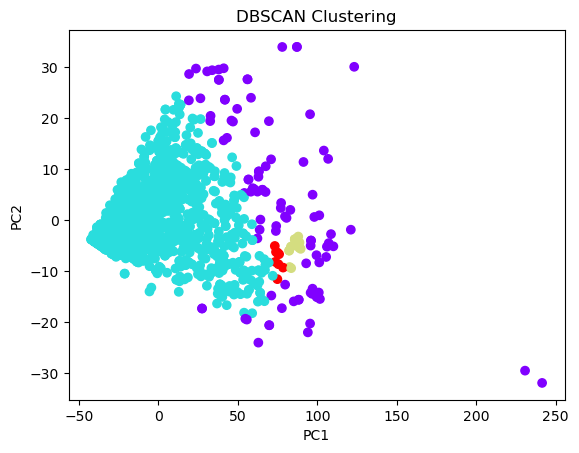

In [218]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [219]:
pca_df[pca_df['Cluster']==-1]

,PC1,PC2,Cluster
14,104.057226,13.643274,-1
15,106.766279,12.012406,-1
16,59.334910,6.264411,-1
33,41.009369,15.641431,-1
53,73.868224,-2.119674,-1
...,...,...,...
1493,99.649350,-15.062382,-1
1496,99.649350,-15.062382,-1
1558,77.886264,33.948471,-1
1572,60.327819,6.063922,-1
